## Online Shopping Sales Analysis

### Read the data

### Q. Print the number of rows and columns of the data

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
# create a DF from a CSV file
salesdatadf = spark.read.format("csv") \
                         .option("header", "true") \
                         .option("inferSchema", "true") \
                         .load("salesdatatrain.csv")

In [3]:
row_number = salesdatadf.count()
column_number = len(salesdatadf.dtypes)

In [4]:
print(row_number,',',column_number)

550068 , 12


### Q. Print schema and change column data types wherever necessary

In [5]:
salesdatadf.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



In [6]:
salesdatadf.show(-1, False)

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
only showing top 0 rows



In [7]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, FloatType, LongType, IntegerType, DateType

# define the structure
schema = StructType([
    StructField("User_ID", IntegerType()),
    StructField("Product_ID", StringType()),
    StructField("Gender", StringType()),
    StructField("Age", StringType()),
    StructField("Occupation", IntegerType()),
    StructField("Stay_In_Current_City_Years", StringType()),
    StructField("Marital_Status", IntegerType()) ,
    StructField("Product_Category_1", IntegerType()),
    StructField("Product_Category_2", IntegerType()),
    StructField("Product_Category_3", IntegerType()),
    StructField("Purchase", IntegerType())
])

In [8]:
salesdatadf1=spark.read.format("csv").option("header","true").schema(schema).load('salesdatatrain.csv')

In [9]:
salesdatadf1.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



### Q. Check basic statistics

In [10]:
#from pyspark.mllib.stat import Statistics
import numpy as np
import pandas as pd
#summary = Statistics.colStats(salesdatadf1.toPandas())
df_panda=salesdatadf1.toPandas()
df_panda.describe()
#print(summary.mean())  # a dense vector containing the mean value for each column
#print(summary.variance())  # column-wise variance
#print(summary.numNonzeros())

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,465342.000000,550068.000000,550068.000000,376430.000000,166821.000000
mean,1.003029e+06,8.076707,1.468494,0.409653,5.404270,9.842329,12.668243
std,1.727592e+03,6.522660,0.989087,0.491770,3.936211,5.086590,4.125338
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003077e+06,7.000000,1.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004478e+06,14.000000,2.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,3.000000,1.000000,20.000000,18.000000,18.000000


In [11]:
salesdatadf1.describe().show()

+-------+------------------+----------+------+------+-----------------+--------------------------+------------------+-------------------+------------------+------------------+------------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|Stay_In_Current_City_Years|    Marital_Status| Product_Category_1|Product_Category_2|Product_Category_3|          Purchase|
+-------+------------------+----------+------+------+-----------------+--------------------------+------------------+-------------------+------------------+------------------+------------------+
|  count|            550068|    550068|550068|550068|           550068|                    550068|            465342|             550068|            550068|            376430|            166821|
|   mean|1003028.8424013031|      null|  null|  null|8.076706879876669|                      null| 1.468494139793958|0.40965298835780306| 5.404270017525106| 9.842329251122386|12.668243206790512|
| stddev|1727.59158553129

### Q. Which age group has the highest purchase share

In [12]:
salesdatadf1.groupby('Age')

In [13]:
salesdatadf1.orderBy("Purchase", ascending=False).select('Age', 'Purchase').show(1)

+-----+--------+
|  Age|Purchase|
+-----+--------+
|46-50|      18|
+-----+--------+
only showing top 1 row



In [14]:
type(salesdatadf1)

pyspark.sql.dataframe.DataFrame

In [16]:
purch_share=df_panda.groupby("Age")["Purchase"].sum().sort_values(ascending=False)
purch_share.head(1)

Age
26-35    846624.0
Name: Purchase, dtype: float64

### Q. Plot the bar chart showing the distribution of Purchase according to the age group

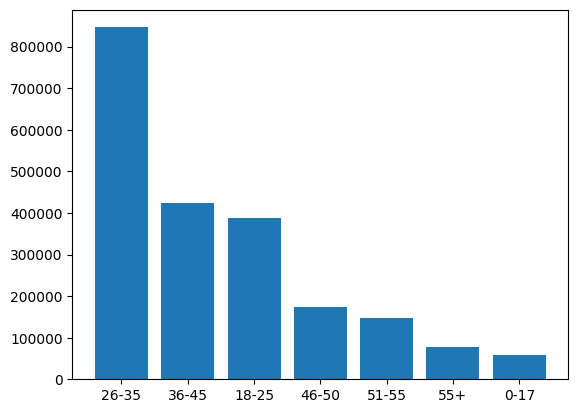

In [18]:
import matplotlib.pyplot as plt
plt.bar(purch_share.index,purch_share.values)
plt.show()

### Q. What is the gender ratio in the dataset

In [24]:
Male_female_ratio=df_panda.Gender.value_counts()[0]/df_panda.Gender.value_counts()[1]

In [25]:
Male_female_ratio

3.050305944377766

### Q. What is the purchase amount ratio with respect to gender

In [27]:
purch_gend=df_panda.groupby("Gender")["Purchase"].sum()

In [28]:
purch_gend

Gender
F     468179.0
M    1645150.0
Name: Purchase, dtype: float64

In [29]:
purch_ratio_m_f=purch_gend[1]/purch_gend[0]
purch_ratio_m_f

3.5139337731935862

### Q. Get shopping summary of each city

In [34]:
df_panda.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [35]:
purch_city=df_panda.groupby("Stay_In_Current_City_Years")["Product_Category_1","Product_Category_2","Product_Category_3","Purchase"].sum()

<ipython-input-35-611c36ec2703>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  purch_city=df_panda.groupby("Stay_In_Current_City_Years")["Product_Category_1","Product_Category_2","Product_Category_3","Purchase"].sum()


In [36]:
purch_city

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Stay_In_Current_City_Years,,,,
A,56547,813387,977988.0,526424.0
B,94452,1242828,1549399.0,877512.0
C,74338,916501,1177561.0,709393.0


### Q. Create table from the dataframe

In [39]:
from pyspark.sql import SparkSession
appName = "PySpark Hive Example"
master = "local"
# Create Spark session with Hive supported.
spark = SparkSession.builder \
.appName(appName) \
.master(master) \
.enableHiveSupport() \
.getOrCreate()

In [42]:
salesdatadf1

DataFrame[User_ID: int, Product_ID: string, Gender: string, Age: string, Occupation: int, Stay_In_Current_City_Years: string, Marital_Status: int, Product_Category_1: int, Product_Category_2: int, Product_Category_3: int, Purchase: int]

### Q.Get the count of users for each city category by using spark sql query

In [44]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark import StorageLevel
from pyspark.sql.session import SparkSession

In [47]:
from pyspark.sql.functions import round
import pyspark.sql.functions as f

In [48]:
salesdatadf.groupby('City_Category').agg(round(f.count('User_ID'), 2).alias('User_Count')).show()

+-------------+----------+
|City_Category|User_Count|
+-------------+----------+
|            B|    231173|
|            C|    171175|
|            A|    147720|
+-------------+----------+

